In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data
df = pd.read_csv('/kaggle/input/fish-market/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
# Check Info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
# Checking Statistic Data
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [5]:
# Finding Duplicate Value In Data
df.duplicated().value_counts()

False    159
dtype: int64

In [6]:
# Checking Missing Value In Data
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [7]:
# Total Col List
print(df.columns.to_list())

['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']


In [8]:
# Diffrent Fish Name
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

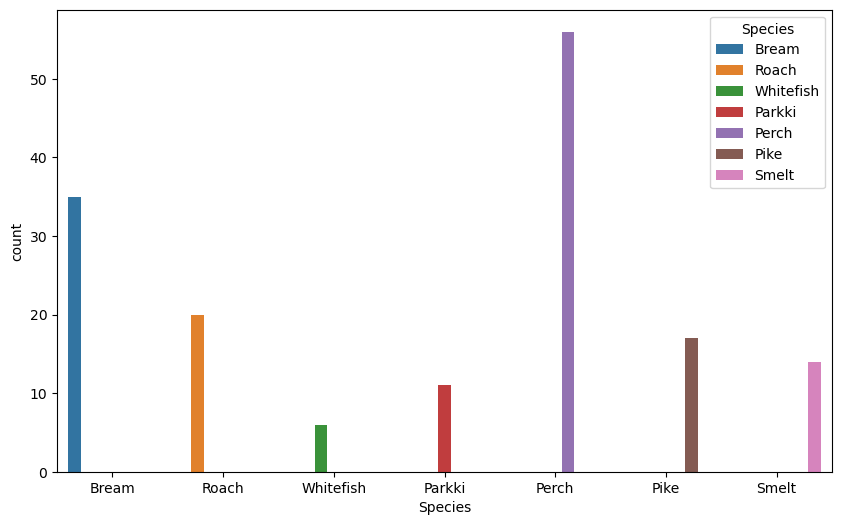

In [9]:
# Fish Count on this DataSet
plt.figure(figsize=(10,6))
sns.countplot(x=df.Species,hue=df.Species)
plt.show()

<AxesSubplot:>

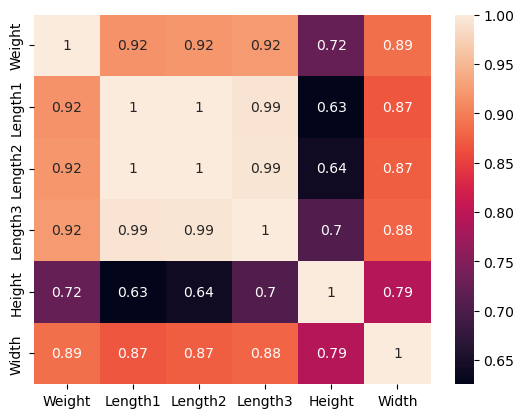

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
df["Mean"] = df['Length1'] + df['Length2'] + df['Length3'] / 3
df = df.drop(columns=['Length1','Length2','Length3'],axis=1)
df

,Species,Weight,Height,Width,Mean
0,Bream,242.0,11.5200,4.0200,58.600000
1,Bream,290.0,12.4800,4.3056,60.700000
2,Bream,340.0,12.3778,4.6961,60.766667
3,Bream,363.0,12.7300,4.4555,66.466667
4,Bream,430.0,12.4440,5.1340,66.833333
...,...,...,...,...,...
154,Smelt,12.2,2.0904,1.3936,28.166667
155,Smelt,13.4,2.4300,1.2690,28.600000
156,Smelt,12.2,2.2770,1.2558,29.700000
157,Smelt,19.7,2.8728,2.0672,32.566667


<AxesSubplot:>

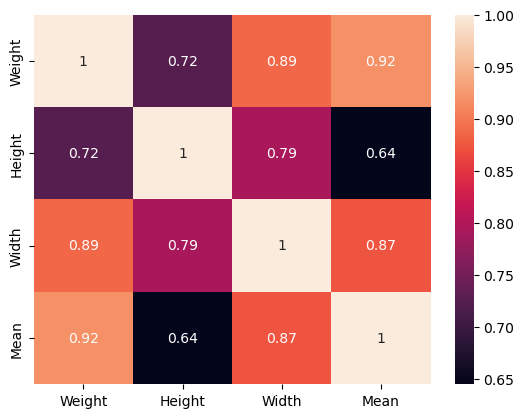

In [12]:
sns.heatmap(df.corr(),annot=True)

In [13]:
# Statistic By Perticular Fish
aa = df.groupby('Species')['Weight', 'Height', 'Width','Mean'].mean()
aa

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Weight,Height,Width,Mean
Species,,,,
Bream,617.828571,15.183211,5.427614,76.199048
Parkki,154.818182,8.962427,3.220736,46.669697
Perch,382.239286,7.861870,4.745723,63.485714
Pike,718.705882,7.713771,5.086382,104.198039
Roach,152.050000,6.694795,3.657850,51.243333
Smelt,11.178571,2.209371,1.340093,27.523810
Whitefish,531.000000,10.027167,5.473050,71.555556


In [14]:
df.describe()

,Weight,Height,Width,Mean
count,159.000000,159.000000,159.000000,159.000000
mean,398.326415,8.970994,4.417486,65.071908
std,357.978317,4.286208,1.685804,24.558245
min,0.000000,1.728400,1.047600,18.833333
25%,120.000000,5.944800,3.385650,47.550000
50%,273.000000,7.786000,4.248500,62.200000
75%,650.000000,12.365900,5.584500,81.583333
max,1650.000000,18.957000,8.142000,145.066667


## Data Visualization

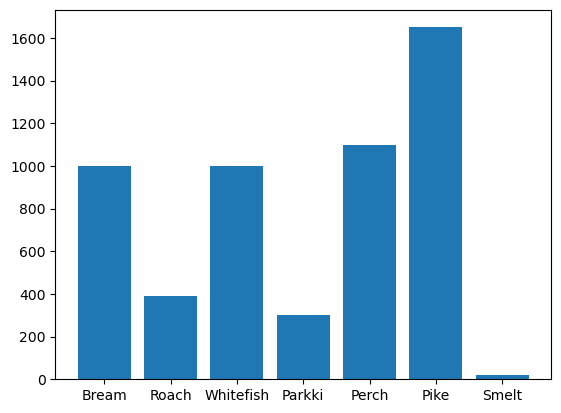

In [15]:
# We See here Pike Fish Weight Is higher & Smelt Fish Weight Is Low
plt.bar(df.Species,df.Weight)

plt.show()

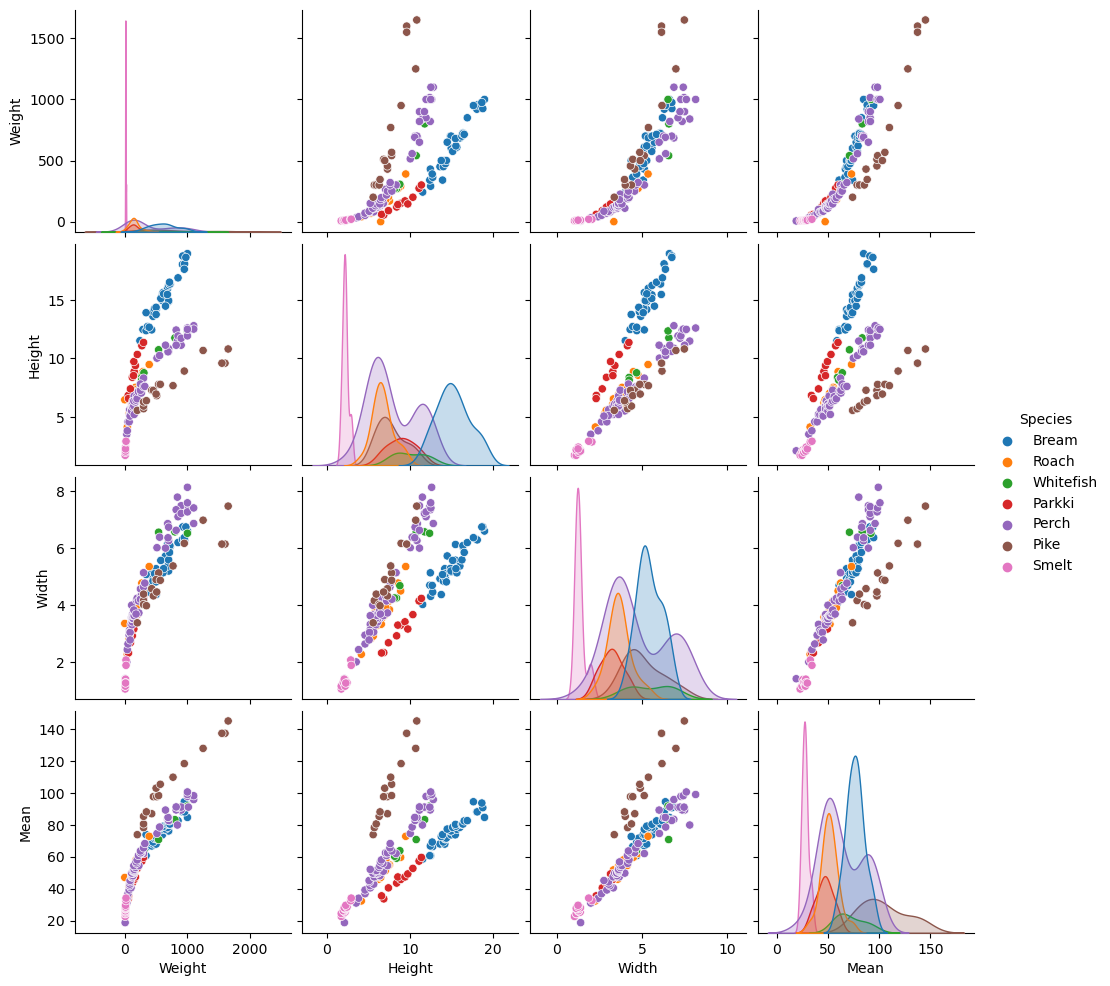

In [16]:
sns.pairplot(df,hue='Species')

In [17]:
# Fish Name List
df['Species'].value_counts().keys()

Index(['Perch', 'Bream', 'Roach', 'Pike', 'Smelt', 'Parkki', 'Whitefish'], dtype='object')

In [18]:
df['Species'] = df['Species'].replace({'Perch':0, 'Bream':1, 'Roach':2, 'Pike':3, 'Smelt':4, 'Parkki':5, 'Whitefish':6})

In [19]:
x = df.drop(columns=['Species','Weight'],axis=1)
y = df['Weight']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((127, 3), (127,), (32, 3), (32,))

# Linear Reg

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [24]:
liner = LinearRegression()
model = liner.fit(x_train,y_train)
model

LinearRegression()

In [25]:
y_pred_te = model.predict(x_test)

r2_scr_te = r2_score(y_test,y_pred_te)
r2_scr_te

0.8755581379282686

# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
dt = DecisionTreeRegressor(max_leaf_nodes=10)
model_dec = dt.fit(x_train,y_train)
model_dec

DecisionTreeRegressor(max_leaf_nodes=10)

In [28]:
y_pred_dec_te = model_dec.predict(x_test)

r2_scr_dt_te = r2_score(y_test,y_pred_dec_te)
r2_scr_dt_te

0.8980235275268711

# Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rf = RandomForestRegressor()
model_rf = rf.fit(x_train,y_train)
model_rf

RandomForestRegressor()

In [31]:
y_pred_rf_te = model_rf.predict(x_test)

r2_scr_rf_te = r2_score(y_test,y_pred_rf_te)
r2_scr_rf_te

0.9524368472918573

In [32]:
data1 = [5.1992,3.1234,41.966]
a1 = model_rf.predict([data1])
print(a1)
print(y_test.values[0])

[83.28]
78.0


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [33]:
data2 = [5.22,3.63,52.2]
a2 = model_rf.predict([data2])
print(a2)
print(y_test.values[4])

[142.84]
150.0


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [34]:
data3 = [6.83,4.46,97.66]
a3 = model_rf.predict([data3])
print(a3)
print(y_test.values[-2])

[407.39]
510.0


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
